In [1]:
import env
import Liam_wrangle
import pandas as pd

In [2]:
train = pd.read_csv('train_zillow.csv')

In [4]:
train.head()

,parcelid,land_type,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,...,in_los_angeles,in_orange_county,in_ventura,house_age,tax_rate,level_of_log_error,acres,square_feet_bins,lot_sqft_bins,acre_bins
0,11724867,261.0,1,1.0,4.0,6.0,1570.0,6037.0,0.0,1.0,...,1,0,0,80.0,81.480056,L5,0.151538,4,0,0
1,12128007,261.0,1,2.0,3.0,8.0,2306.0,6037.0,0.0,2.0,...,1,0,0,46.0,83.868458,L3,0.301354,5,1,0
2,10757399,261.0,1,3.0,4.0,7.0,2309.0,6037.0,0.0,3.0,...,1,0,0,61.0,77.918010,L3,0.219972,5,0,0
3,10911485,261.0,1,3.0,3.0,8.0,1912.0,6037.0,0.0,3.0,...,1,0,0,73.0,82.224030,L4,0.153329,4,0,0
4,13903643,261.0,0,3.0,4.0,6.0,2539.0,6059.0,0.0,3.0,...,0,1,0,16.0,73.929172,L2,0.104913,6,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28675 entries, 0 to 28674
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parcelid             28675 non-null  int64  
 1   land_type            28675 non-null  float64
 2   has_heating_system   28675 non-null  int64  
 3   bathrooms            28675 non-null  float64
 4   bedrooms             28675 non-null  float64
 5   quality              28675 non-null  float64
 6   square_feet          28675 non-null  float64
 7   fips                 28675 non-null  float64
 8   has_fireplace        28675 non-null  float64
 9   full_bathrooms       28675 non-null  float64
 10  latitude             28675 non-null  float64
 11  longitude            28675 non-null  float64
 12  lot_square_feet      28675 non-null  float64
 13  has_pool             28675 non-null  float64
 14  city                 28675 non-null  float64
 15  county               28675 non-null 

In [6]:
import Liam_explore

In [62]:
binary_vars = ['bedrooms', 'bathrooms', 'land_type', 'has_heating_system',
               'fips', 'has_fireplace', 'full_bathrooms','has_pool', 'city','county',
               'zip_code','unitcnt','in_los_angeles', 'in_orange_county', 'in_ventura',
                'lot_sqft_bins','acre_bins','square_feet_bins' ]

quant_vars = ['square_feet', 'lot_square_feet', 'quality', 'latitude', 'bathrooms', 'bedrooms',
                'longitude','room_count', 'structure_tax_value','tax_value', 'land_tax_value', 
              'taxamount', 'house_age', 'tax_rate']

categorical_target = 'level_of_log_error'
continuous_target = 'logerror'

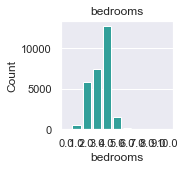

      bedrooms  Count  Percent
3.0        4.0  12808    44.67
4.0        3.0   7512    26.20
2.0        2.0   5890    20.54
5.0        5.0   1563     5.45
1.0        1.0    593     2.07
6.0        6.0    185     0.65
0.0        0.0     92     0.32
7.0        7.0     24     0.08
8.0        8.0      6     0.02
10.0       9.0      1     0.00
9.0       10.0      1     0.00
_________________________________________________________________


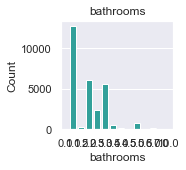

      bathrooms  Count  Percent
2.0         1.0  12748    44.46
3.0         2.0   6025    21.01
1.0         3.0   5599    19.53
2.5         2.5   2324     8.10
4.0         5.0    759     2.65
1.5         3.5    508     1.77
3.5         1.5    333     1.16
4.5         4.0    165     0.58
5.0         6.0    136     0.47
0.0         4.5     49     0.17
6.0         0.0     15     0.05
5.5         7.0     11     0.04
7.0         5.5      2     0.01
10.0       10.0      1     0.00
_________________________________________________________________


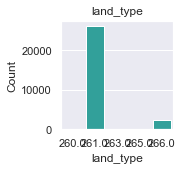

       land_type  Count  Percent
261.0      261.0  26093    91.00
266.0      266.0   2384     8.31
265.0      265.0    175     0.61
263.0      263.0     14     0.05
260.0      260.0      9     0.03
_________________________________________________________________


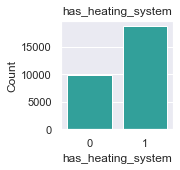

   has_heating_system  Count  Percent
1                   1  18788    65.52
0                   0   9887    34.48
_________________________________________________________________


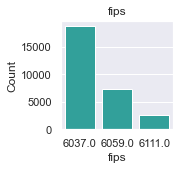

          fips  Count  Percent
6037.0  6037.0  18789    65.52
6059.0  6059.0   7244    25.26
6111.0  6111.0   2642     9.21
_________________________________________________________________


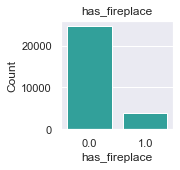

     has_fireplace  Count  Percent
0.0            0.0  24739    86.27
1.0            1.0   3936    13.73
_________________________________________________________________


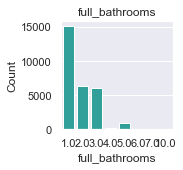

      full_bathrooms  Count  Percent
2.0              1.0  15134    52.78
3.0              2.0   6356    22.17
1.0              3.0   6101    21.28
4.0              5.0    922     3.22
5.0              4.0    145     0.51
6.0              6.0     14     0.05
7.0              7.0      2     0.01
10.0            10.0      1     0.00
_________________________________________________________________


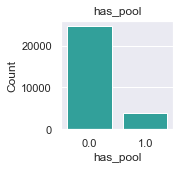

     has_pool  Count  Percent
0.0       0.0  24739    86.27
1.0       1.0   3936    13.73
_________________________________________________________________


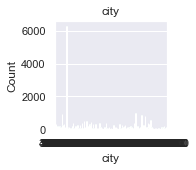

            city  Count  Percent
12447.0  12447.0   6303    21.98
46298.0  47019.0    998     3.48
25218.0  10608.0    937     3.27
5534.0   51239.0    894     3.12
40227.0  53027.0    781     2.72
...          ...    ...      ...
10815.0  10815.0      1     0.00
13232.0  14906.0      1     0.00
36078.0  36078.0      1     0.00
21395.0  21395.0      1     0.00
53162.0  53162.0      1     0.00

[173 rows x 3 columns]
_________________________________________________________________


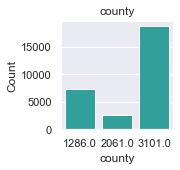

        county  Count  Percent
3101.0  3101.0  18789    65.52
1286.0  1286.0   7244    25.26
2061.0  2061.0   2642     9.21
_________________________________________________________________


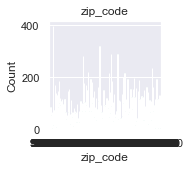

         zip_code  Count  Percent
97319.0   95997.0    397     1.38
97318.0   96295.0    318     1.11
97328.0   96387.0    289     1.01
97118.0   96449.0    287     1.00
97329.0   96181.0    282     0.98
...           ...    ...      ...
96963.0   97119.0      1     0.00
97111.0   95998.0      1     0.00
96467.0   96980.0      1     0.00
97331.0   96467.0      1     0.00
96226.0   96963.0      1     0.00

[382 rows x 3 columns]
_________________________________________________________________


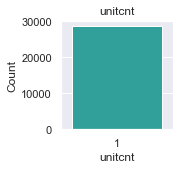

   unitcnt  Count  Percent
1        1  28675    100.0
_________________________________________________________________


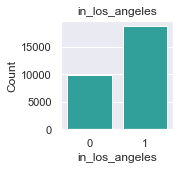

   in_los_angeles  Count  Percent
1               1  18789    65.52
0               0   9886    34.48
_________________________________________________________________


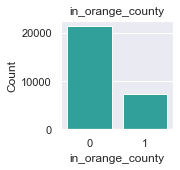

   in_orange_county  Count  Percent
0                 0  21431    74.74
1                 1   7244    25.26
_________________________________________________________________


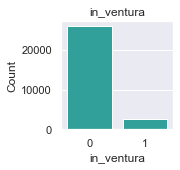

   in_ventura  Count  Percent
0           0  26033    90.79
1           1   2642     9.21
_________________________________________________________________


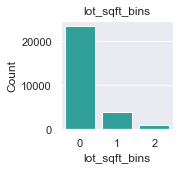

   lot_sqft_bins  Count  Percent
0              0  23596    82.29
1              1   4006    13.97
2              2   1073     3.74
_________________________________________________________________


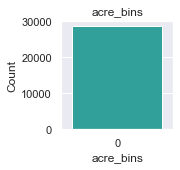

   acre_bins  Count  Percent
0          0  28675    100.0
_________________________________________________________________


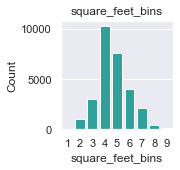

   square_feet_bins  Count  Percent
3                 4  10289    35.88
4                 5   7529    26.26
5                 6   3975    13.86
2                 3   3041    10.61
6                 7   2122     7.40
7                 2   1053     3.67
8                 8    455     1.59
9                 9    154     0.54
1                 1     57     0.20
_________________________________________________________________


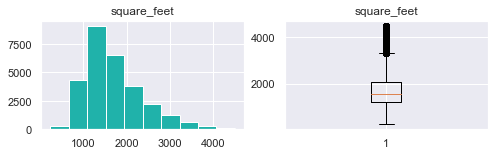

count    28675.000000
mean      1704.775833
std        683.232001
min        240.000000
25%       1216.000000
50%       1550.000000
75%       2058.000000
max       4504.000000
Name: square_feet, dtype: float64


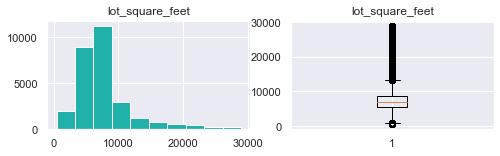

count    28675.000000
mean      7871.548282
std       4506.758370
min        435.000000
25%       5480.000000
50%       6755.000000
75%       8580.000000
max      28985.000000
Name: lot_square_feet, dtype: float64


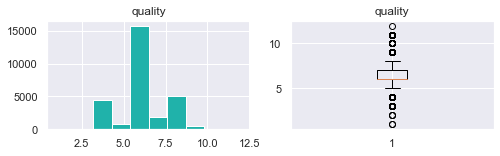

count    28675.000000
mean         6.137786
std          1.303343
min          1.000000
25%          6.000000
50%          6.000000
75%          7.000000
max         12.000000
Name: quality, dtype: float64


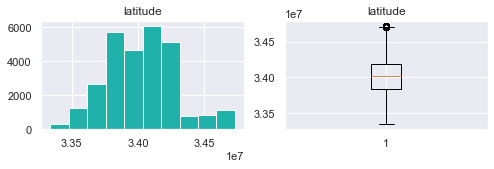

count    2.867500e+04
mean     3.402329e+07
std      2.644480e+05
min      3.334122e+07
25%      3.383426e+07
50%      3.402638e+07
75%      3.418596e+07
max      3.472924e+07
Name: latitude, dtype: float64


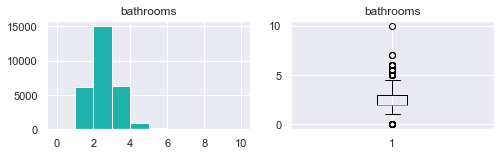

count    28675.000000
mean         2.146138
std          0.802035
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bathrooms, dtype: float64


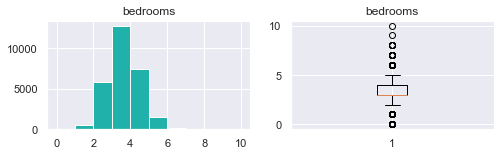

count    28675.000000
mean         3.138797
std          0.925968
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: bedrooms, dtype: float64


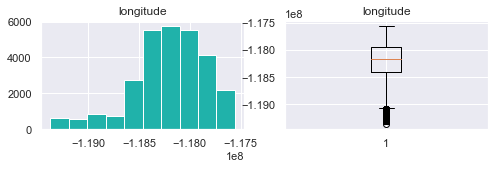

count    2.867500e+04
mean    -1.182068e+08
std      3.600307e+05
min     -1.193717e+08
25%     -1.184007e+08
50%     -1.181670e+08
75%     -1.179469e+08
max     -1.175554e+08
Name: longitude, dtype: float64


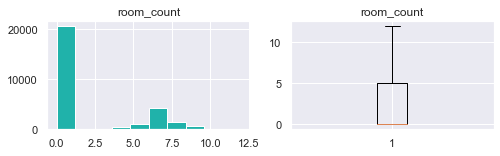

count    28675.000000
mean         1.864516
std          3.086762
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max         12.000000
Name: room_count, dtype: float64


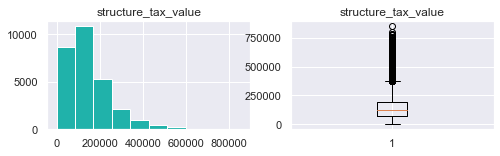

count     28675.000000
mean     149271.053217
std      104330.520489
min         129.000000
25%       75756.000000
50%      124140.000000
75%      194662.000000
max      854291.000000
Name: structure_tax_value, dtype: float64


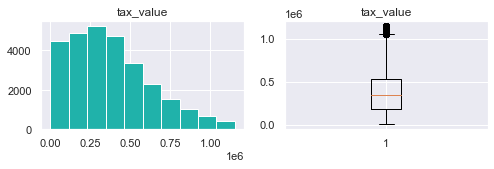

count    2.867500e+04
mean     3.829886e+05
std      2.512638e+05
min      3.254000e+03
25%      1.840690e+05
50%      3.419180e+05
75%      5.310210e+05
max      1.153324e+06
Name: tax_value, dtype: float64


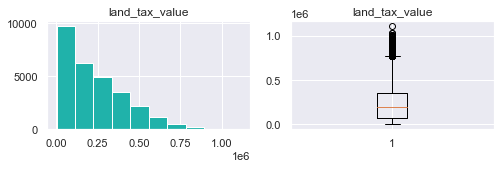

count    2.867500e+04
mean     2.337881e+05
std      1.902009e+05
min      1.217000e+03
25%      6.904250e+04
50%      1.946710e+05
75%      3.499965e+05
max      1.116775e+06
Name: land_tax_value, dtype: float64


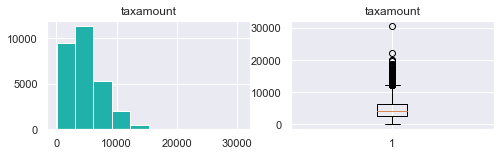

count    28675.000000
mean      4742.948604
std       2935.610548
min         19.920000
25%       2510.285000
50%       4263.140000
75%       6385.920000
max      30690.350000
Name: taxamount, dtype: float64


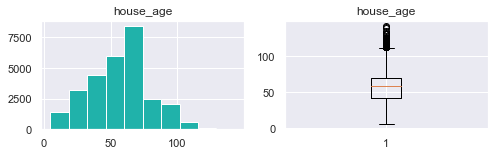

count    28675.000000
mean        57.257890
std         22.359644
min          5.000000
25%         42.000000
50%         59.000000
75%         70.000000
max        143.000000
Name: house_age, dtype: float64


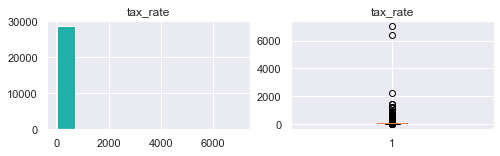

count    28675.000000
mean        79.365726
std         62.579489
min          2.208073
25%         73.080041
50%         80.941329
75%         85.372095
max       7071.385542
Name: tax_rate, dtype: float64


In [63]:
Liam_explore.explore_univariate(train, binary_vars, quant_vars)

## Takeaways

- 6037 = LA
- 6059 = Orange
- 6111 = Ventura

bedrooms 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=25630.0, pvalue=0.3508742256170444)
         chi2       p-value  degrees of freedom
0  344.140268  5.184038e-50                  40

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
bedrooms                                               
0.0                   26    10    18    19    19     92
1.0                  142   103    82   113   153    593
2.0                 1493  1111   957  1086  1243   5890
3.0                 2628  2665  2655  2540  2320  12808
4.0                 1280  1580  1667  1514  1471   7512
5.0                  226   298   341   361   337   1563
6.0                   26    25    35    45    54    185
7.0                    5     1     0     5    13     24
8.0                    1     1     1     0     3      6
9.0                    0     0     1     0     0      1
10.0                   0     0     0     0     1      1
All                 5827  5794  5757  5683  5614  28675

expec

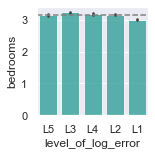


_____________________

bathrooms 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=123538.0, pvalue=0.2301509768820439)
         chi2       p-value  degrees of freedom
0  532.578388  6.884878e-81                  52

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
bathrooms                                              
0.0                   15     9     8     8     9     49
1.0                 1482  1023   885   979  1230   5599
1.5                   90   114   116   101    87    508
2.0                 2707  2630  2514  2528  2369  12748
2.5                  279   534   652   492   367   2324
3.0                 1035  1221  1318  1275  1176   6025
3.5                   47    66    75    74    71    333
4.0                  120   143   120   160   216    759
4.5                   22    31    39    32    41    165
5.0                   22    19    27    28    40    136
5.5                    4     1     2     3     1     11
6.0                    4     3     1     2     5     15
7.0  

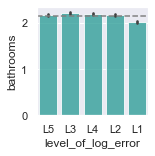


_____________________

land_type 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
        chi2       p-value  degrees of freedom
0  67.090589  3.207436e-08                  16

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
land_type                                              
260.0                  5     0     1     1     2      9
261.0               5310  5258  5288  5157  5080  26093
263.0                  0     1     1     2    10     14
265.0                 41    28    19    28    59    175
266.0                471   507   448   495   463   2384
All                 5827  5794  5757  5683  5614  28675

expected:
              0            1            2            3            4
0     1.828875     1.818518     1.806905     1.783679     1.762023
1  5302.315990  5272.287428  5238.619041  5171.282267  5108.495275
2     2.844917     2.828806     2.810741     2.774612     2.740924
3    35.561465    35.360070    35.134263    34.682650    34.261552
4   484.448753  

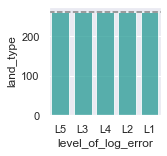


_____________________

has_heating_system 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=95676392.0, pvalue=2.6755652477516485e-05)
         chi2       p-value  degrees of freedom
0  227.272023  5.103033e-48                   4

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
has_heating_system                                     
0                   1612  2155  2298  2007  1815   9887
1                   4215  3639  3459  3676  3799  18788
All                 5827  5794  5757  5683  5614  28675

expected:
              0            1            2            3            4
0  2009.121151  1997.742912  1984.985493  1959.470654  1935.679791
1  3817.878849  3796.257088  3772.014507  3723.529346  3678.320209


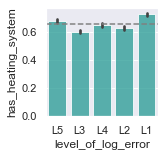


_____________________

fips 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
         chi2       p-value  degrees of freedom
0  307.271683  1.165832e-61                   8

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
fips                                                   
6037.0              4259  3595  3415  3669  3851  18789
6059.0              1126  1588  1733  1487  1310   7244
6111.0               442   611   609   527   453   2642
All                 5827  5794  5757  5683  5614  28675

expected:
              0            1            2            3            4
0  3818.082058  3796.459146  3772.215275  3723.727533  3678.515990
1  1472.041430  1463.704830  1454.357733  1435.663540  1418.232467
2   536.876513   533.836024   530.426992   523.608928   517.251543


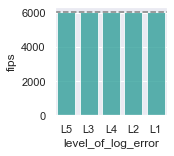


_____________________

has_fireplace 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=48101967.5, pvalue=0.22571706218581744)
        chi2       p-value  degrees of freedom
0  93.584054  2.279483e-19                   4

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
has_fireplace                                          
0.0                 5202  4876  4853  4891  4917  24739
1.0                  625   918   904   792   697   3936
All                 5827  5794  5757  5683  5614  28675

expected:
              0            1            2            3            4
0  5027.171857  4998.701517  4966.780227  4902.937646  4843.408753
1   799.828143   795.298483   790.219773   780.062354   770.591247


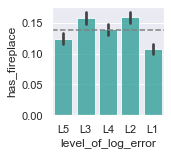


_____________________

full_bathrooms 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
         chi2       p-value  degrees of freedom
0  310.320356  2.179622e-49                  28

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
full_bathrooms                                         
1.0                 1570  1137  1001  1078  1315   6101
2.0                 3004  3176  3175  3031  2748  15134
3.0                 1083  1285  1392  1349  1247   6356
4.0                  141   175   159   191   256    922
5.0                   26    18    29    31    41    145
6.0                    3     3     1     2     5     14
7.0                    0     0     0     1     1      2
10.0                   0     0     0     0     1      1
All                 5827  5794  5757  5683  5614  28675

expected:
              0            1            2            3            4
0  1239.774263  1232.753060  1224.880802  1209.136286  1194.455588
1  3075.355466  3057.938832  3038.411090  2999.

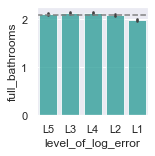


_____________________

has_pool 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=48101967.5, pvalue=0.22571706218581744)
        chi2       p-value  degrees of freedom
0  93.584054  2.279483e-19                   4

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
has_pool                                               
0.0                 5202  4876  4853  4891  4917  24739
1.0                  625   918   904   792   697   3936
All                 5827  5794  5757  5683  5614  28675

expected:
              0            1            2            3            4
0  5027.171857  4998.701517  4966.780227  4902.937646  4843.408753
1   799.828143   795.298483   790.219773   780.062354   770.591247


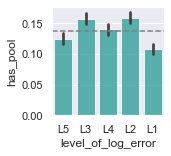


_____________________

city 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
         chi2        p-value  degrees of freedom
0  2022.15993  2.540301e-131                 688

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
city                                                   
3491.0                 1     2     0     2     1      6
4406.0                48    44    46    36    38    212
5465.0                31    27    33    27    18    136
5534.0               190   222   184   156   142    894
6021.0                27    21    12    16    21     97
...                  ...   ...   ...   ...   ...    ...
396054.0              61    70    47    62    44    284
396550.0              11     3     2     6    14     36
396551.0              16    14    10    18    13     71
396556.0               8    12     9     9    10     48
All                 5827  5794  5757  5683  5614  28675

[174 rows x 6 columns]

expected:
               0           1           2    

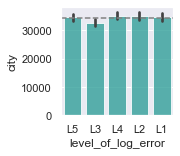


_____________________

county 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
         chi2       p-value  degrees of freedom
0  307.271683  1.165832e-61                   8

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
county                                                 
1286.0              1126  1588  1733  1487  1310   7244
2061.0               442   611   609   527   453   2642
3101.0              4259  3595  3415  3669  3851  18789
All                 5827  5794  5757  5683  5614  28675

expected:
              0            1            2            3            4
0  1472.041430  1463.704830  1454.357733  1435.663540  1418.232467
1   536.876513   533.836024   530.426992   523.608928   517.251543
2  3818.082058  3796.459146  3772.215275  3723.727533  3678.515990


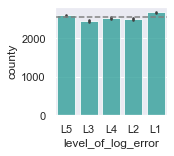


_____________________

zip_code 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
          chi2        p-value  degrees of freedom
0  3436.267833  7.595885e-149                1524

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
zip_code                                               
95982.0               17     7     1     3    10     38
95983.0               28    12    12    12    17     81
95984.0               38    10     5     8    11     72
95985.0               11     5     5     9    15     45
95986.0                7     3     5     9     7     31
...                  ...   ...   ...   ...   ...    ...
97330.0               47    49    44    29    22    191
97331.0                0     1     0     0     0      1
97344.0                6     3     2     2     5     18
399675.0               1     0     1     1     0      3
All                 5827  5794  5757  5683  5614  28675

[383 rows x 6 columns]

expected:
              0          1          2     

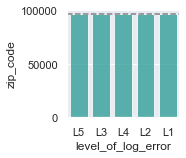


_____________________

unitcnt 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
   chi2  p-value  degrees of freedom
0   0.0      1.0                   0

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
unitcnt                                                
1                   5827  5794  5757  5683  5614  28675
All                 5827  5794  5757  5683  5614  28675

expected:
         0       1       2       3       4
0  5827.0  5794.0  5757.0  5683.0  5614.0


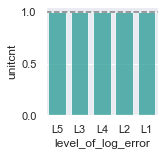


_____________________

in_los_angeles 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=95421276.0, pvalue=0.00013166734400980897)
         chi2       p-value  degrees of freedom
0  302.608397  2.965742e-64                   4

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
in_los_angeles                                         
0                   1568  2199  2342  2014  1763   9886
1                   4259  3595  3415  3669  3851  18789
All                 5827  5794  5757  5683  5614  28675

expected:
              0            1            2            3           4
0  2008.917942  1997.540854  1984.784725  1959.272467  1935.48401
1  3818.082058  3796.459146  3772.215275  3723.727533  3678.51599


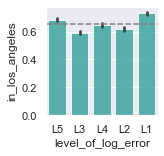


_____________________

in_orange_county 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=75077878.0, pvalue=2.9315261941072477e-05)
        chi2       p-value  degrees of freedom
0  207.90318  7.505628e-44                   4

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
in_orange_county                                       
0                   4701  4206  4024  4196  4304  21431
1                   1126  1588  1733  1487  1310   7244
All                 5827  5794  5757  5683  5614  28675

expected:
             0           1            2           3            4
0  4354.95857  4330.29517  4302.642267  4247.33646  4195.767533
1  1472.04143  1463.70483  1454.357733  1435.66354  1418.232467


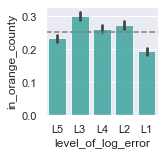


_____________________

in_ventura 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=34387548.0, pvalue=0.9959762762458125)
        chi2       p-value  degrees of freedom
0  52.389499  1.143536e-10                   4

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
in_ventura                                             
0                   5385  5183  5148  5156  5161  26033
1                    442   611   609   527   453   2642
All                 5827  5794  5757  5683  5614  28675

expected:
              0            1            2            3            4
0  5290.123487  5260.163976  5226.573008  5159.391072  5096.748457
1   536.876513   533.836024   530.426992   523.608928   517.251543


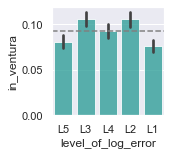


_____________________

lot_sqft_bins 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=45671978.5, pvalue=0.0006458699907158373)
      chi2       p-value  degrees of freedom
0  61.2536  2.644187e-10                   8

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
lot_sqft_bins                                          
0                   4760  4843  4858  4673  4462  23596
1                    821   755   730   791   909   4006
2                    246   196   169   219   243   1073
All                 5827  5794  5757  5683  5614  28675

expected:
              0            1            2            3            4
0  4794.904690  4767.749747  4737.303296  4676.410392  4619.631874
1   814.052729   809.442511   804.273479   793.935414   784.295867
2   218.042581   216.807742   215.423226   212.654194   210.072258


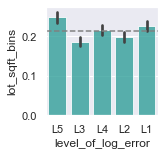


_____________________

acre_bins 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
   chi2  p-value  degrees of freedom
0   0.0      1.0                   0

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
acre_bins                                              
0                   5827  5794  5757  5683  5614  28675
All                 5827  5794  5757  5683  5614  28675

expected:
         0       1       2       3       4
0  5827.0  5794.0  5757.0  5683.0  5614.0


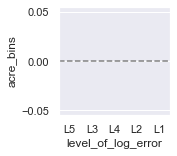


_____________________

square_feet_bins 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
         chi2       p-value  degrees of freedom
0  314.452416  3.909563e-48                  32

observed:
 level_of_log_error    L1    L2    L3    L4    L5    All
square_feet_bins                                       
1                     14     7     8     8    20     57
2                    761   557   473   568   682   3041
3                   2279  2167  2045  1911  1887  10289
4                   1519  1548  1550  1513  1399   7529
5                    668   809   896   863   739   3975
6                    320   395   468   476   463   2122
7                    169   187   218   231   248   1053
8                     77   100    79    87   112    455
9                     20    24    20    26    64    154
All                 5827  5794  5757  5683  5614  28675

expected:
              0            1            2            3            4
0    11.582877    11.517280    11.443731    11.296635    1

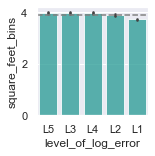


_____________________

square_feet 
____________________



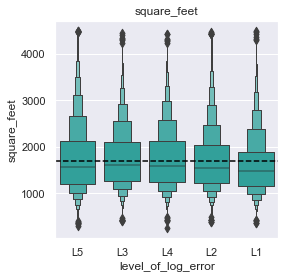

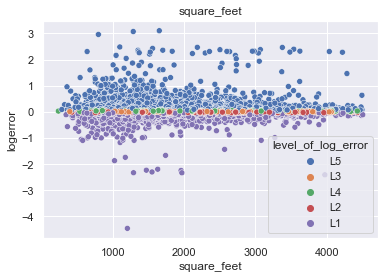

level_of_log_error           L1           L2           L3           L4  \
count               5827.000000  5794.000000  5757.000000  5683.000000   
mean                1608.640810  1694.739040  1742.540212  1742.493401   
std                  650.107248   662.523559   661.487429   684.899178   
min                  347.000000   378.000000   397.000000   240.000000   
25%                 1154.000000  1226.000000  1257.000000  1240.000000   
50%                 1468.000000  1544.000000  1598.000000  1590.000000   
75%                 1894.500000  2034.000000  2105.000000  2122.000000   
max                 4504.000000  4469.000000  4453.000000  4442.000000   

level_of_log_error           L5  
count               5614.000000  
mean                1738.009441  
std                  745.462047  
min                  288.000000  
25%                 1200.000000  
50%                 1562.000000  
75%                 2131.000000  
max                 4496.000000   


Spearman's Correlation T

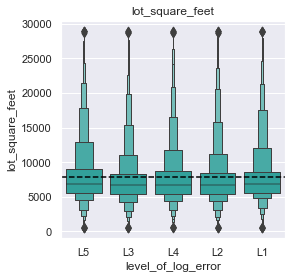

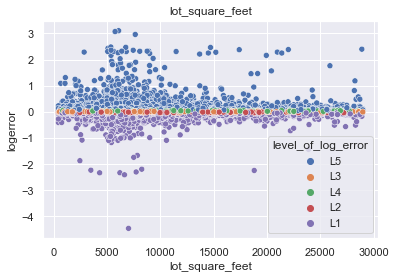

level_of_log_error            L1            L2            L3            L4  \
count                5827.000000   5794.000000   5757.000000   5683.000000   
mean                 8055.722842   7711.203659   7583.673615   7857.641739   
std                  4621.294195   4355.724767   4233.984945   4531.038498   
min                   435.000000    435.000000    480.000000    435.000000   
25%                  5620.000000   5462.000000   5370.000000   5408.500000   
50%                  6817.000000   6732.000000   6672.000000   6750.000000   
75%                  8601.000000   8400.000000   8290.000000   8657.500000   
max                 28935.000000  28943.000000  28985.000000  28912.000000   

level_of_log_error            L5  
count                5614.000000  
mean                 8155.156573  
std                  4755.743210  
min                   435.000000  
25%                  5502.250000  
50%                  6876.500000  
75%                  9060.000000  
max              

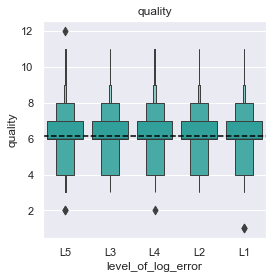

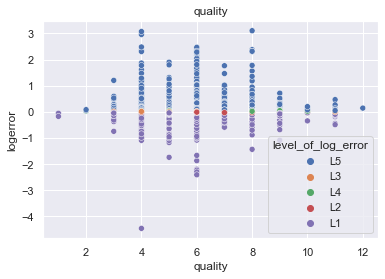

level_of_log_error           L1           L2           L3           L4  \
count               5827.000000  5794.000000  5757.000000  5683.000000   
mean                   6.049768     6.157922     6.194546     6.198839   
std                    1.375299     1.256126     1.212492     1.311372   
min                    1.000000     3.000000     3.000000     2.000000   
25%                    6.000000     6.000000     6.000000     6.000000   
50%                    6.000000     6.000000     6.000000     6.000000   
75%                    7.000000     7.000000     7.000000     7.000000   
max                   11.000000    11.000000    11.000000    11.000000   

level_of_log_error           L5  
count               5614.000000  
mean                   6.088351  
std                    1.348976  
min                    2.000000  
25%                    6.000000  
50%                    6.000000  
75%                    7.000000  
max                   12.000000   


Spearman's Correlation T

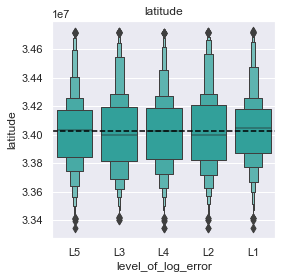

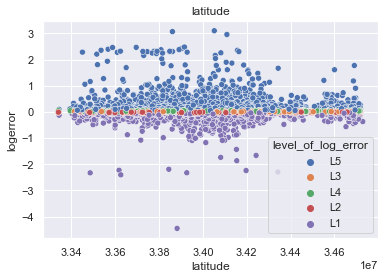

level_of_log_error            L1            L2            L3            L4  \
count               5.827000e+03  5.794000e+03  5.757000e+03  5.683000e+03   
mean                3.403796e+07  3.402436e+07  3.401614e+07  3.401909e+07   
std                 2.469997e+05  2.788548e+05  2.789917e+05  2.651108e+05   
min                 3.334429e+07  3.334128e+07  3.340250e+07  3.334122e+07   
25%                 3.387139e+07  3.382182e+07  3.381376e+07  3.382786e+07   
50%                 3.404355e+07  3.399934e+07  3.399883e+07  3.402455e+07   
75%                 3.417693e+07  3.420498e+07  3.419675e+07  3.418614e+07   
max                 3.472924e+07  3.471786e+07  3.471829e+07  3.471644e+07   

level_of_log_error            L5  
count               5.614000e+03  
mean                3.401856e+07  
std                 2.497783e+05  
min                 3.334425e+07  
25%                 3.384018e+07  
50%                 3.403447e+07  
75%                 3.417507e+07  
max              

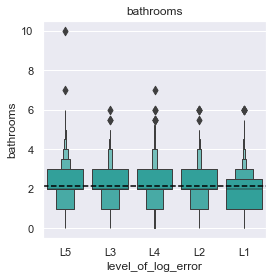

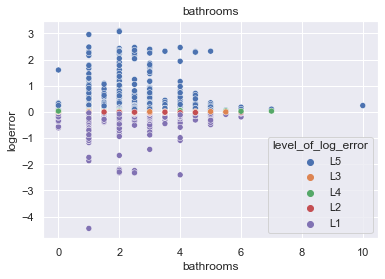

level_of_log_error           L1           L2           L3           L4  \
count               5827.000000  5794.000000  5757.000000  5683.000000   
mean                   2.013558     2.159648     2.213132     2.192504   
std                    0.797183     0.770578     0.761920     0.793309   
min                    0.000000     0.000000     0.000000     0.000000   
25%                    1.000000     2.000000     2.000000     2.000000   
50%                    2.000000     2.000000     2.000000     2.000000   
75%                    2.500000     3.000000     3.000000     3.000000   
max                    6.000000     6.000000     6.000000     7.000000   

level_of_log_error           L5  
count               5614.000000  
mean                   2.154168  
std                    0.869471  
min                    0.000000  
25%                    2.000000  
50%                    2.000000  
75%                    3.000000  
max                   10.000000   


Spearman's Correlation T

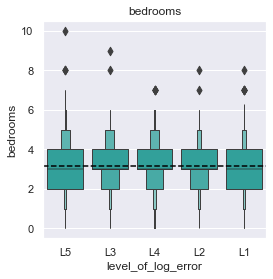

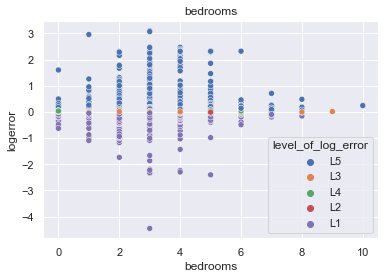

level_of_log_error           L1           L2           L3           L4  \
count               5827.000000  5794.000000  5757.000000  5683.000000   
mean                   2.996568     3.157577     3.224075     3.179835   
std                    0.909379     0.882061     0.890548     0.935081   
min                    0.000000     0.000000     0.000000     0.000000   
25%                    2.000000     3.000000     3.000000     3.000000   
50%                    3.000000     3.000000     3.000000     3.000000   
75%                    4.000000     4.000000     4.000000     4.000000   
max                    8.000000     8.000000     9.000000     7.000000   

level_of_log_error           L5  
count               5614.000000  
mean                   3.138048  
std                    0.994911  
min                    0.000000  
25%                    2.000000  
50%                    3.000000  
75%                    4.000000  
max                   10.000000   


Spearman's Correlation T

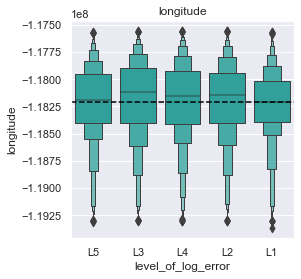

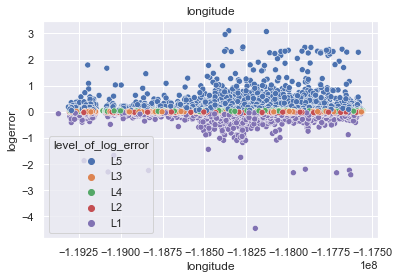

level_of_log_error            L1            L2            L3            L4  \
count               5.827000e+03  5.794000e+03  5.757000e+03  5.683000e+03   
mean               -1.182317e+08 -1.182023e+08 -1.181823e+08 -1.182000e+08   
std                 3.282355e+05  3.686516e+05  3.825279e+05  3.655182e+05   
min                -1.193717e+08 -1.193049e+08 -1.193026e+08 -1.193057e+08   
25%                -1.183915e+08 -1.183986e+08 -1.184060e+08 -1.184100e+08   
50%                -1.182110e+08 -1.181471e+08 -1.181207e+08 -1.181536e+08   
75%                -1.180140e+08 -1.179417e+08 -1.179003e+08 -1.179254e+08   
max                -1.175665e+08 -1.175604e+08 -1.175596e+08 -1.175554e+08   

level_of_log_error            L5  
count               5.614000e+03  
mean               -1.182178e+08  
std                 3.511928e+05  
min                -1.193122e+08  
25%                -1.184040e+08  
50%                -1.181904e+08  
75%                -1.179549e+08  
max              

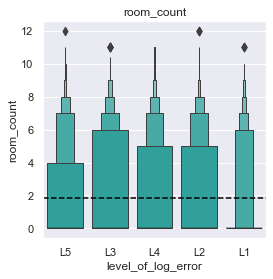

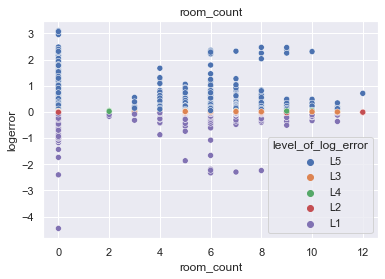

level_of_log_error           L1           L2           L3           L4  \
count               5827.000000  5794.000000  5757.000000  5683.000000   
mean                   1.516904     2.037107     2.107869     1.908675   
std                    2.843047     3.177934     3.211829     3.131788   
min                    0.000000     0.000000     0.000000     0.000000   
25%                    0.000000     0.000000     0.000000     0.000000   
50%                    0.000000     0.000000     0.000000     0.000000   
75%                    0.000000     5.000000     6.000000     5.000000   
max                   11.000000    12.000000    11.000000    11.000000   

level_of_log_error           L5  
count               5614.000000  
mean                   1.752939  
std                    3.020399  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    4.000000  
max                   12.000000   


Spearman's Correlation T

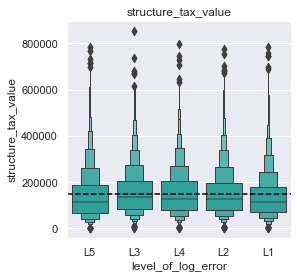

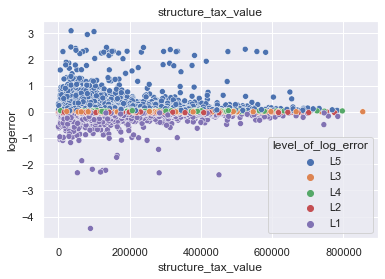

level_of_log_error             L1             L2             L3  \
count                 5827.000000    5794.000000    5757.000000   
mean                139364.241462  151821.964791  157251.719298   
std                 100721.143642  102898.924432  103099.628454   
min                    129.000000     470.000000    1015.000000   
25%                  69140.500000   80491.250000   83246.000000   
50%                 116000.000000  125778.000000  133773.000000   
75%                 179672.000000  195627.750000  205596.000000   
max                 784173.000000  774980.000000  854291.000000   

level_of_log_error             L4             L5  
count                 5683.000000    5614.000000  
mean                154812.728313  143127.301211  
std                 104684.458688  109138.250993  
min                   2918.000000     302.000000  
25%                  79100.000000   66259.000000  
50%                 128712.000000  114000.000000  
75%                 204000.000000  1863

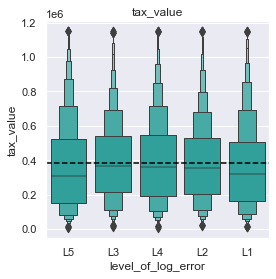

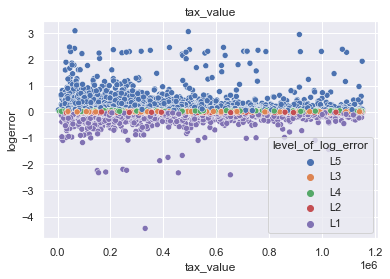

level_of_log_error            L1            L2            L3            L4  \
count               5.827000e+03  5.794000e+03  5.757000e+03  5.683000e+03   
mean                3.688260e+05  3.868234e+05  3.967067e+05  3.962167e+05   
std                 2.561976e+05  2.383993e+05  2.413395e+05  2.533575e+05   
min                 1.361600e+04  1.647700e+04  1.352400e+04  7.771000e+03   
25%                 1.655045e+05  2.015960e+05  2.123370e+05  1.939395e+05   
50%                 3.180890e+05  3.550000e+05  3.670000e+05  3.588790e+05   
75%                 5.077255e+05  5.296882e+05  5.436550e+05  5.490000e+05   
max                 1.151799e+06  1.153324e+06  1.152372e+06  1.150000e+06   

level_of_log_error            L5  
count               5.614000e+03  
mean                3.662724e+05  
std                 2.648619e+05  
min                 3.254000e+03  
25%                 1.530330e+05  
50%                 3.064525e+05  
75%                 5.220000e+05  
max              

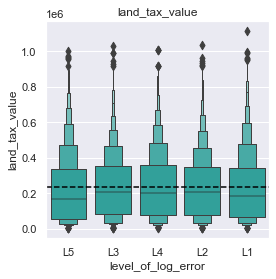

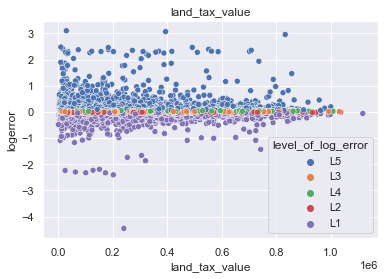

level_of_log_error            L1            L2            L3            L4  \
count               5.827000e+03  5.794000e+03  5.757000e+03  5.683000e+03   
mean                2.296007e+05  2.350015e+05  2.394784e+05  2.414752e+05   
std                 1.963870e+05  1.822357e+05  1.831821e+05  1.917628e+05   
min                 1.217000e+03  5.361000e+03  4.912000e+03  3.906000e+03   
25%                 6.466300e+04  7.497900e+04  8.242100e+04  7.690150e+04   
50%                 1.820510e+05  2.062760e+05  2.086000e+05  2.038510e+05   
75%                 3.426130e+05  3.489955e+05  3.550000e+05  3.612865e+05   
max                 1.116775e+06  1.036264e+06  1.030416e+06  1.009357e+06   

level_of_log_error             L5  
count                 5614.000000  
mean                223265.268436  
std                 196574.920332  
min                   2250.000000  
25%                  55312.000000  
50%                 166335.500000  
75%                 338061.250000  
max      

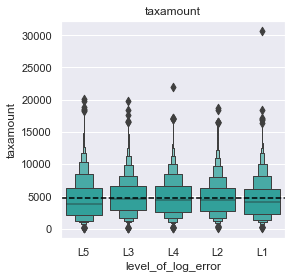

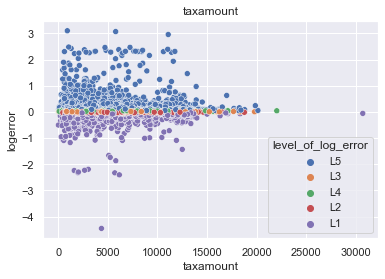

level_of_log_error            L1            L2            L3            L4  \
count                5827.000000   5794.000000   5757.000000   5683.000000   
mean                 4596.523880   4784.991265   4916.708676   4881.451596   
std                  2987.427563   2764.794174   2851.398763   2942.295001   
min                    19.920000    139.590000     51.260000     85.000000   
25%                  2320.280000   2727.955000   2808.320000   2628.915000   
50%                  4042.000000   4398.885000   4545.430000   4429.780000   
75%                  6176.520000   6314.550000   6554.700000   6590.720000   
max                 30690.350000  18757.520000  19785.710000  22023.800000   

level_of_log_error            L5  
count                5614.000000  
mean                 4533.146760  
std                  3106.737528  
min                    49.180000  
25%                  2132.670000  
50%                  3809.200000  
75%                  6239.055000  
max              

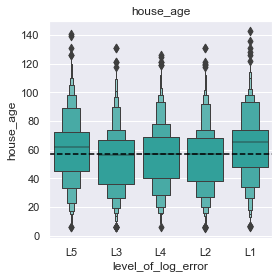

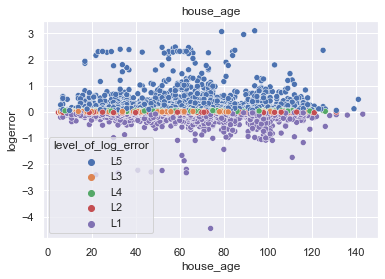

level_of_log_error           L1           L2           L3           L4  \
count               5827.000000  5794.000000  5757.000000  5683.000000   
mean                  62.702591    54.579738    53.065485    55.329931   
std                   22.396306    21.622907    21.763274    21.894134   
min                    6.000000     5.000000     6.000000     6.000000   
25%                   48.000000    38.000000    36.000000    40.000000   
50%                   65.000000    57.000000    56.000000    57.000000   
75%                   74.000000    68.000000    67.000000    69.000000   
max                  143.000000   131.000000   131.000000   126.000000   

level_of_log_error           L5  
count               5614.000000  
mean                  60.621482  
std                   22.552213  
min                    6.000000  
25%                   45.000000  
50%                   62.000000  
75%                   72.000000  
max                  141.000000   


Spearman's Correlation T

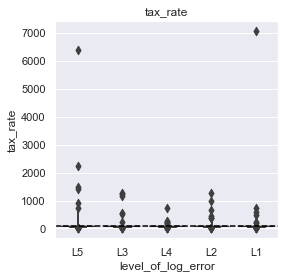

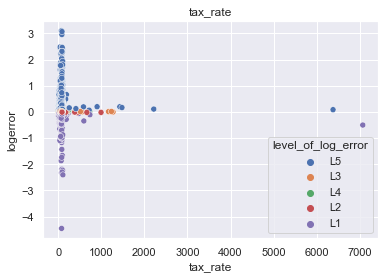

level_of_log_error           L1           L2           L3           L4  \
count               5827.000000  5794.000000  5757.000000  5683.000000   
mean                  78.791859    79.320097    79.685485    78.986512   
std                   93.443659    26.397036    30.650951    15.766864   
min                    2.893912     9.272679     3.601216     7.453035   
25%                   72.430828    73.156894    73.218668    73.778357   
50%                   80.641210    81.157430    81.180146    81.284804   
75%                   83.970463    86.176353    86.196718    85.800537   
max                 7071.385542  1262.538075  1270.854467   729.800000   

level_of_log_error           L5  
count               5614.000000  
mean                  80.064430  
std                   94.907848  
min                    2.208073  
25%                   72.568983  
50%                   80.478747  
75%                   84.370795  
max                 6380.493274   


Spearman's Correlation T

In [64]:
Liam_explore.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

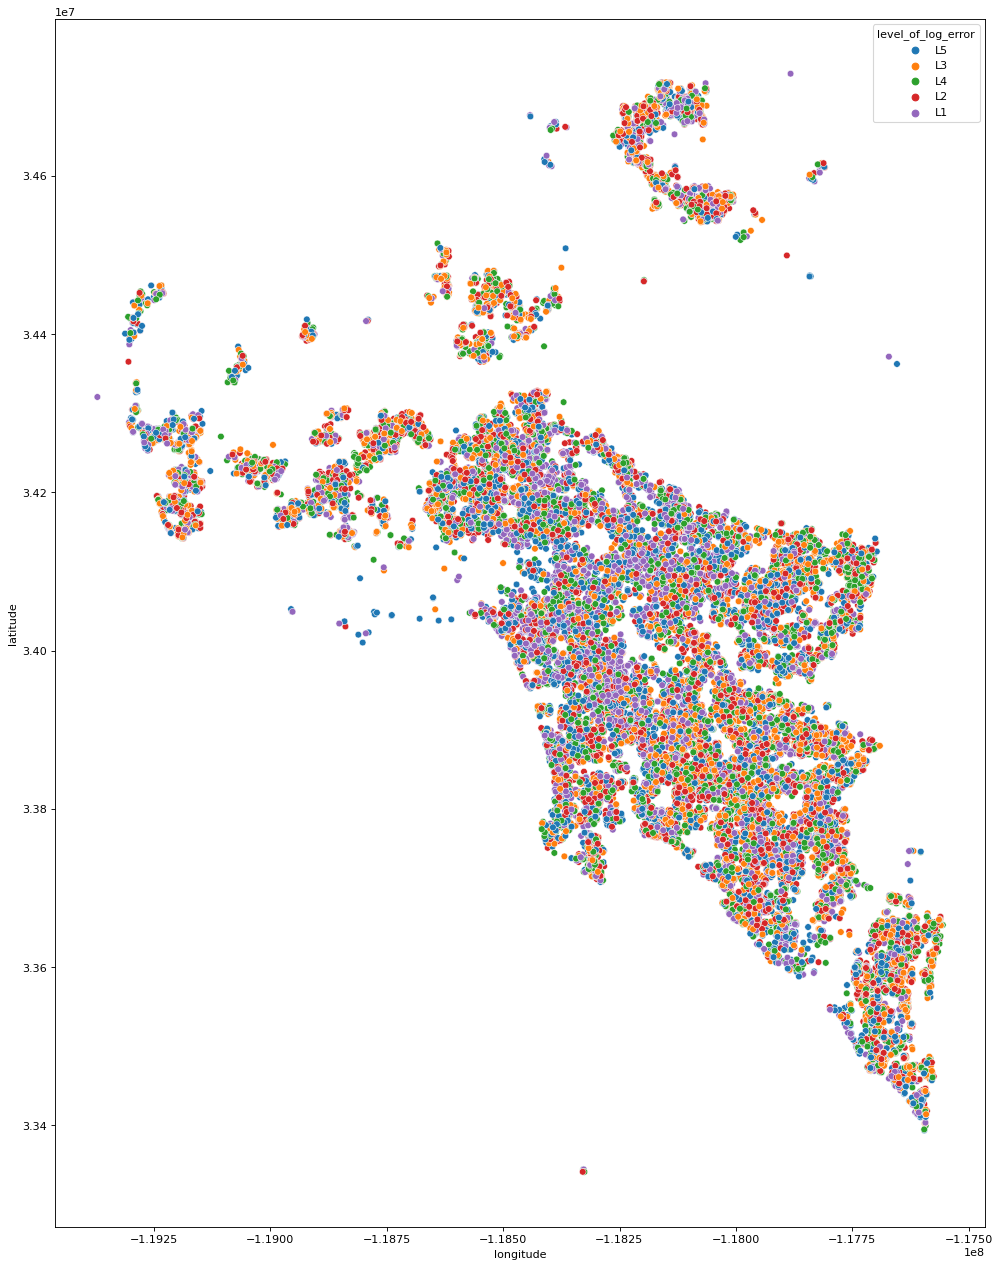

In [26]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(15, 20), dpi=80)
sns.scatterplot(x = train.longitude, y = train.latitude, hue = train.level_of_log_error)

In [28]:
import matplotlib.pyplot as plt

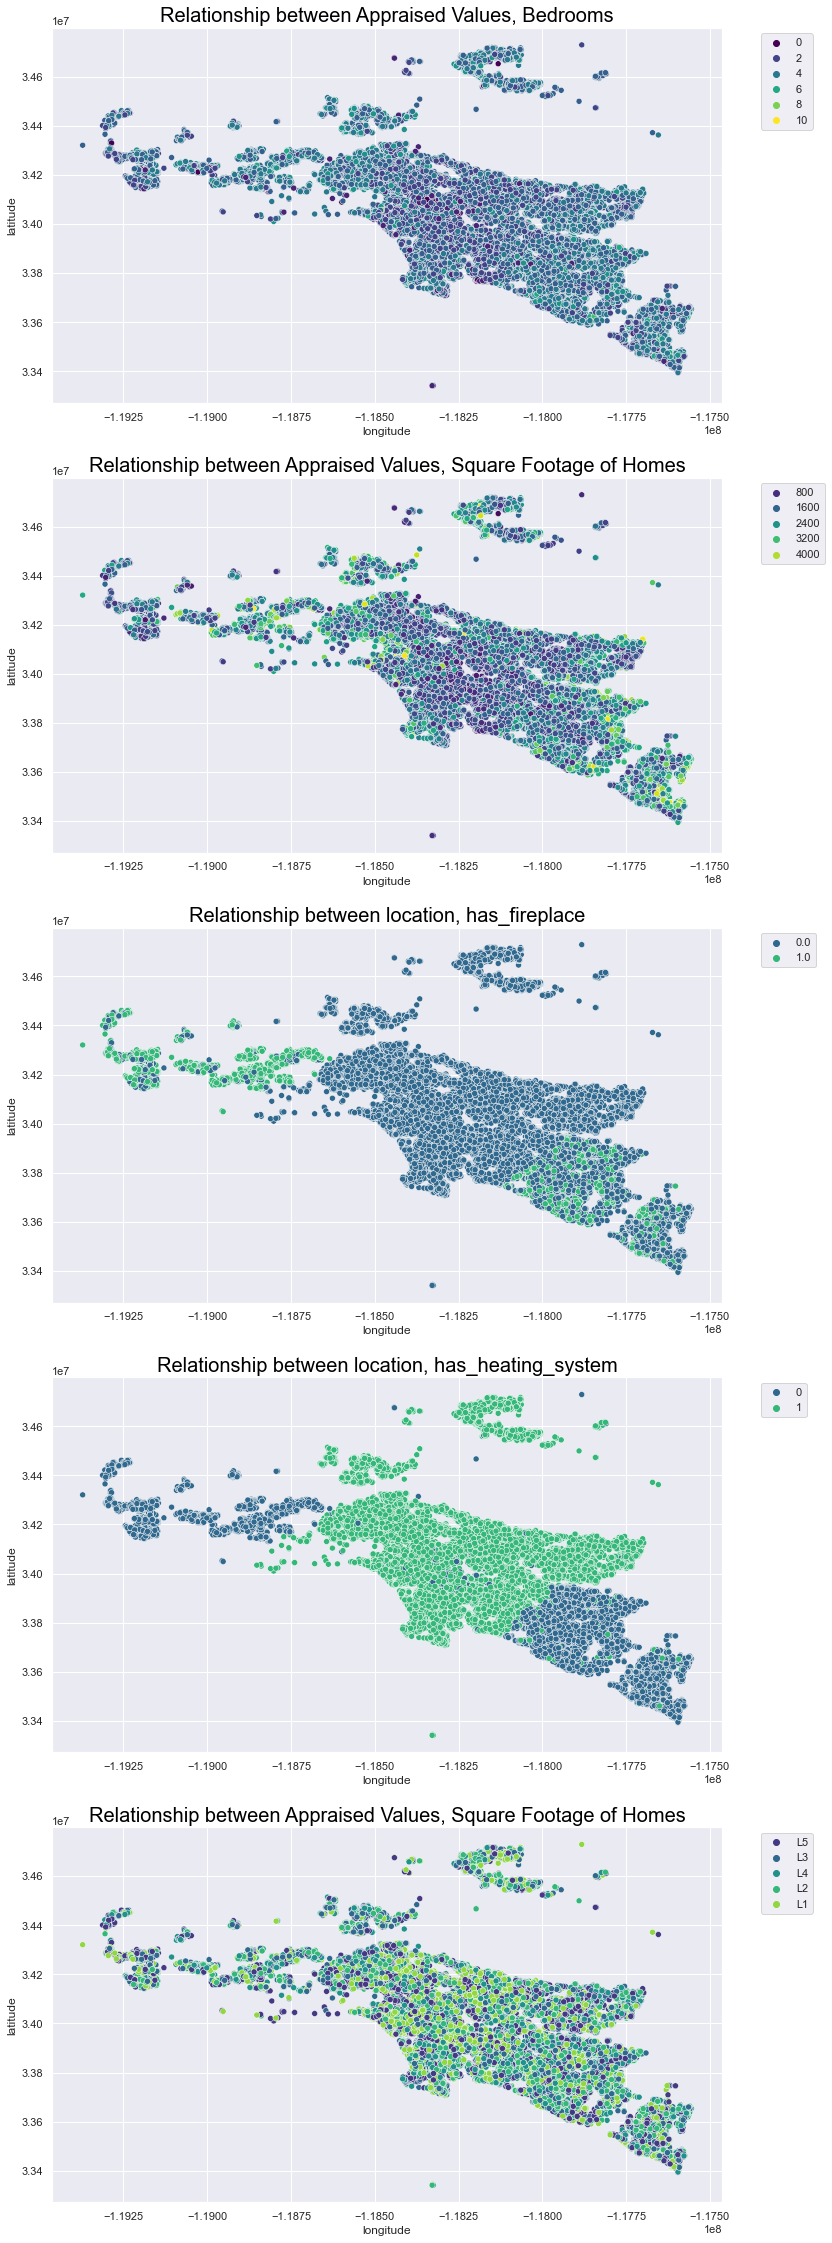

In [59]:
plt.subplots(5, 1, figsize=(12,40), sharey=True)
sns.set(style="darkgrid")

plt.subplot(5,1,1)
plt.title("Relationship between Appraised Values, Bedrooms", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue=train.bedrooms, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,2)
plt.title("Relationship between Appraised Values, Square Footage of Homes", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue='square_feet', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
plt.subplot(5,1,3)
plt.title("Relationship between location, has_fireplace", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue=train.has_fireplace, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,4)
plt.title("Relationship between location, has_heating_system", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue=train.has_heating_system, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,5)
plt.title("Relationship between Appraised Values, Square Footage of Homes", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue='level_of_log_error', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [55]:
train.bathrooms.value_counts()

2.0     12748
3.0      6025
1.0      5599
2.5      2324
4.0       759
1.5       508
3.5       333
4.5       165
5.0       136
0.0        49
6.0        15
5.5        11
7.0         2
10.0        1
Name: bathrooms, dtype: int64

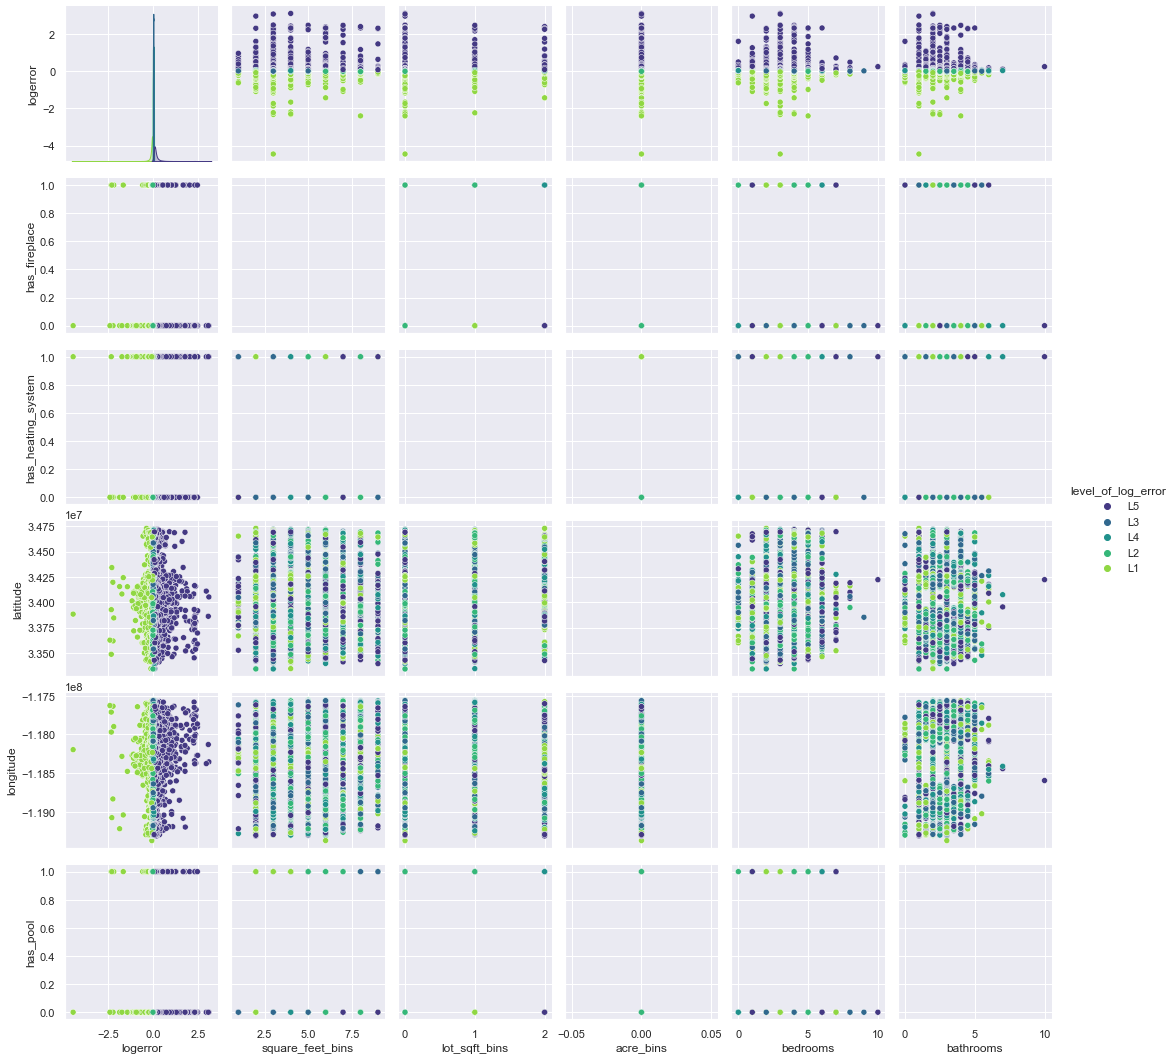

In [65]:
sns.pairplot(data = train, hue = 'level_of_log_error', 
             x_vars = ['logerror', 'square_feet_bins', 'lot_sqft_bins', 'acre_bins', 
                       'bedrooms', 'bathrooms'],
             y_vars = ['logerror', 'has_fireplace', 'has_heating_system', 'latitude', 
                       'longitude', 'has_pool'], palette='viridis')

## Takeaways

- The higher the log error the more the home is overvalued compared to the zestimate
- The lower the log error the more the home is undervalued compared to the zestimate

# Clustering

In [73]:
import viz_kmeans
from sklearn.cluster import KMeans

#define the thing
kmeans = KMeans(n_clusters=4)

# fit the thing
kmeans.fit(train)

# Use (predict using) the thing 
kmeans.predict(train)

ValueError: could not convert string to float: 'bedrooms'

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28675 entries, 0 to 28674
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parcelid             28675 non-null  int64  
 1   land_type            28675 non-null  float64
 2   has_heating_system   28675 non-null  int64  
 3   bathrooms            28675 non-null  float64
 4   bedrooms             28675 non-null  float64
 5   quality              28675 non-null  float64
 6   square_feet          28675 non-null  float64
 7   fips                 28675 non-null  float64
 8   has_fireplace        28675 non-null  float64
 9   full_bathrooms       28675 non-null  float64
 10  latitude             28675 non-null  float64
 11  longitude            28675 non-null  float64
 12  lot_square_feet      28675 non-null  float64
 13  has_pool             28675 non-null  float64
 14  city                 28675 non-null  float64
 15  county               28675 non-null 